## k-means Python 
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period. In this exercise, we will use the FOA data from 1961 to 2013. This chunk of the dataset is focused on two utilizations of each food item available:

- Food - refers to the total amount of the food item available as human food during the reference period.
- Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

Dataset's attributes:

- Are Abbreviation: Country name abbreviation 
- Area code 
- Area:County name 
- Item code
- Item: Food item 
- Element Code
- Element - Food or Feed 
- Unit: 1000 tonnes
- Latitude - geographic coordinate that specifies the north–south position of a point on the Earth's surface 
- Longitude - geographic coordinate that specifies the east-west position of a point on the
- Earth's surface 
- Production per year:Amount of food item produced in 1000 tonnes over the years


We will see if we can find clusters to countries based on their productivity. 


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("FAO.csv")

In [3]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


# EDA

In [5]:
df['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [6]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "CÙte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

In [7]:
df.shape

(21477, 63)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(17938, 63)

### EDA - Country production exploration

Since the dataset contains several rows for each country (each row representing different food item), let's calculate total produce for each country to see who are the top producers

In [10]:
country_list = list(df['Area'].unique()) # Get unique country names
year_list = list(df.iloc[:,10:].columns) # Get years

total_produce = []
for country in country_list:  
    yearly_total_produce = []
    for year in year_list:
        yearly_total_produce.append(df[year][df['Area'] == country].sum())
    total_produce.append([country,sum(yearly_total_produce)])

total_produce.sort(key=lambda x: x[1],reverse=True) # Sort dataframe based on total produce descending

In [11]:
total_produce

[['China, mainland', 76248859.0],
 ['United States of America', 41719176.0],
 ['India', 36549150.0],
 ['Brazil', 13818239.0],
 ['Germany', 12300442.0],
 ['Japan', 9840441.0],
 ['France', 8789026.0],
 ['Italy', 7734322.0],
 ['Nigeria', 7354579.0],
 ['Indonesia', 7298902.0],
 ['Poland', 7294259.0],
 ['United Kingdom', 7178458.0],
 ['Mexico', 6604367.0],
 ['Turkey', 6059572.0],
 ['Spain', 5753765.0],
 ['Pakistan', 5317867.0],
 ['Canada', 4822993.0],
 ['Egypt', 4390461.0],
 ['Iran (Islamic Republic of)', 4028414.0],
 ['Philippines', 3526422.0],
 ['Republic of Korea', 3360762.0],
 ['Argentina', 3280173.0],
 ['Bangladesh', 3256368.0],
 ['Romania', 3138963.0],
 ['Thailand', 3096077.0],
 ['Viet Nam', 3068282.0],
 ['Netherlands', 2785042.0],
 ['South Africa', 2441574.0],
 ['Colombia', 2294039.0],
 ['Australia', 2274086.0],
 ['China, Taiwan Province of', 1802998.0],
 ['Hungary', 1755762.0],
 ['Myanmar', 1670735.0],
 ['United Republic of Tanzania', 1595582.0],
 ['Uganda', 1590424.0],
 ['Algeria',

Let's also calculate yearly total produce for each country and plot how it changed over years.

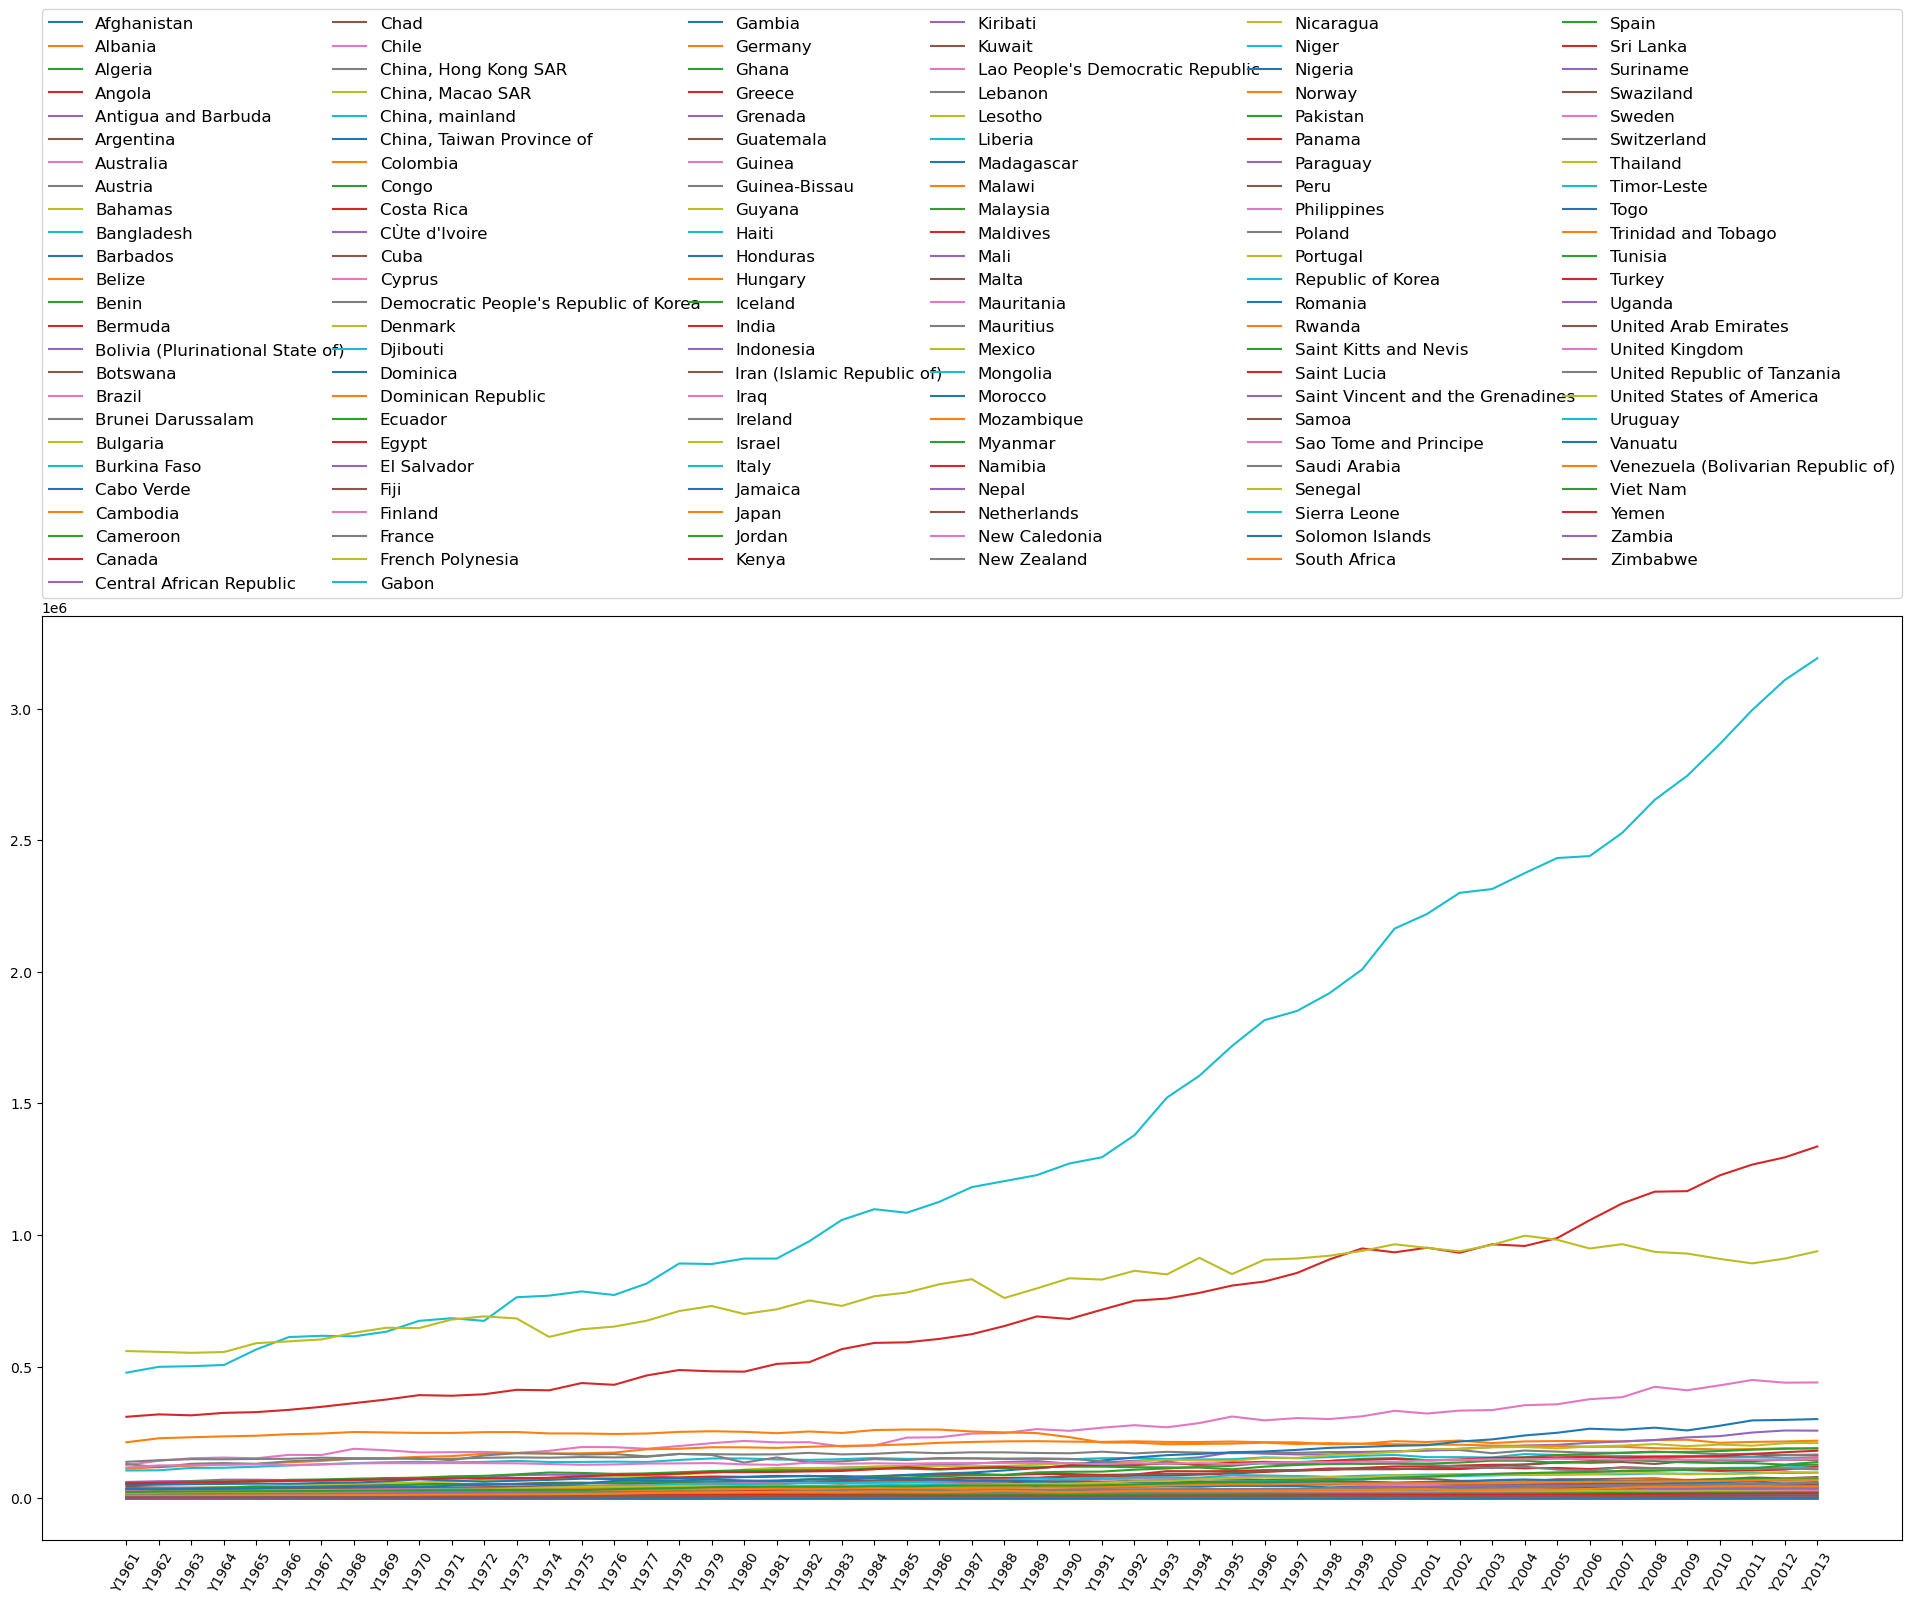

In [12]:
plt.figure(figsize=(24,12)) 
for country in country_list:
    yearly_total_produce = []
    for year in year_list:
        yearly_total_produce.append(df[year][df['Area'] == country].sum())
    plt.plot(yearly_total_produce, label=country)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1, .122), loc=3, ncol=6, fontsize =12, mode="expand", borderaxespad=0.) #bbox (x, y, width, height)
plt.show()

Looking at the total produce list we calculated and the yearly plot, we see China mainland, India and USA stands out. 
They are the countries with most food and feed production.

### EDA - Country food vs feed production exploration

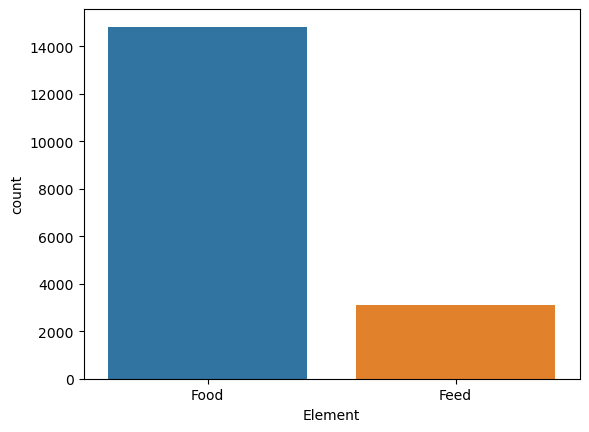

In [13]:
sns.countplot(x = "Element", data=df)
plt.show()

We see a big difference in food and feed production in our dataset. Let's see how the top countries produce in terms of food vs feed

<Figure size 500x500 with 0 Axes>

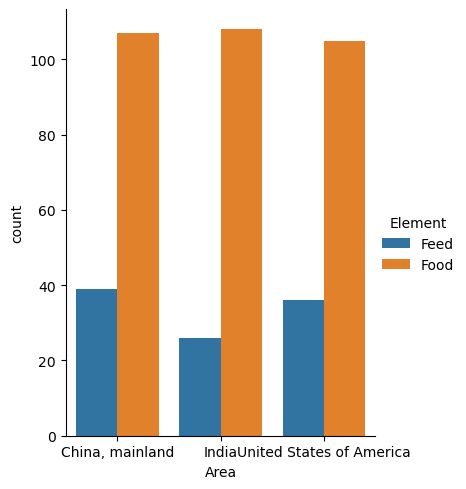

In [14]:
plt.figure(figsize=(5,5)) 
sns.catplot(x = "Area", data=df[(df['Area'] == "India") | 
                               (df['Area'] == "China, mainland") | 
                               (df['Area'] == "United States of America")], 
               kind="count", hue="Element", aspect=.8)

We see that while the food production in the top countries are pretty similar, their feed production are different. Their rank in total production seem to depend on their feed production.

### EDA - Item exploration

Let's create another dataframe with items and their total production each year from 1961 to 2013

In [15]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce

In [16]:
item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,451170.0,457394.0,465091.0,458982.0,472345.0,476831.0,483749.0,505674.0,509423,515473
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,359319.0,364271.0,370722.0,376902.0,387941.0,392300.0,396694.0,402247.0,404971,408832
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,75310.0,72645.0,75996.0,73052.0,73210.0,74452.0,71338.0,68230.0,70248,78532
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,524530.0,532367.0,522323.0,552367.0,561953.0,538207.0,557834.0,567059.0,586746,632847
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,24390.0,24310.0,24914.0,25958.0,25257.0,23667.0,26283.0,24555.0,24535,24820


In [17]:
item_df.shape

(115, 54)

Let's calculate a sum column to calculate the total amount produced for each item over years and a production rank to see which items were most produced

In [18]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,465091.0,458982.0,472345.0,476831.0,483749.0,505674.0,509423,515473,17617146.0,7.0
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,370722.0,376902.0,387941.0,392300.0,396694.0,402247.0,404971,408832,14438667.0,8.0
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,75996.0,73052.0,73210.0,74452.0,71338.0,68230.0,70248,78532,3870905.0,20.0
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,522323.0,552367.0,561953.0,538207.0,557834.0,567059.0,586746,632847,19540017.0,5.0
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,24914.0,25958.0,25257.0,23667.0,26283.0,24555.0,24535,24820,1200084.0,38.0


Top ten items produced from 1961 to 2013:

In [19]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values()

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

Let's create a heatmap of production of food items over years to see if we can detect the items whose production has drastically increased over the years

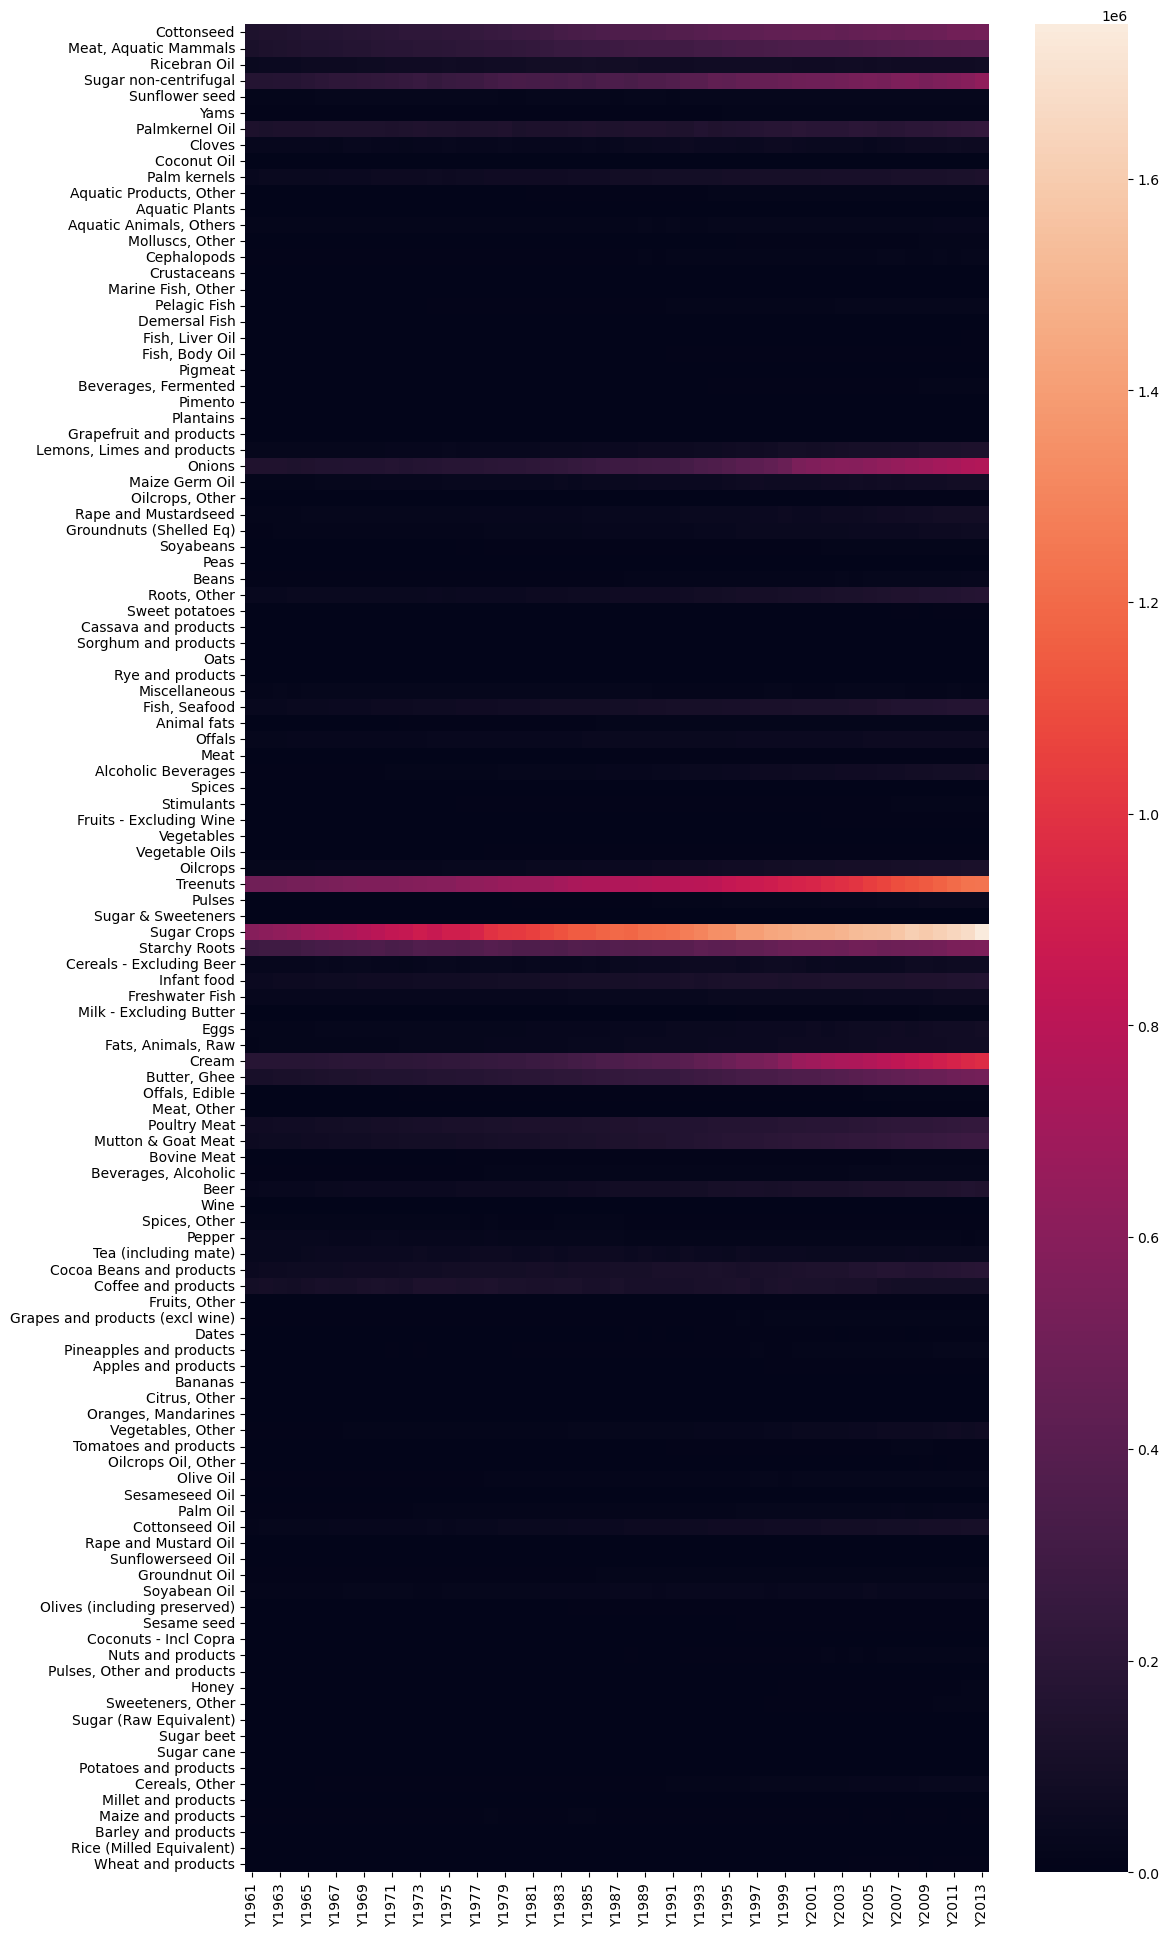

In [20]:
new_item_df = item_df.drop(["Item_Name","Sum","Production_Rank"], axis = 1)
fig, ax = plt.subplots(figsize=(12,24))
sns.heatmap(new_item_df,ax=ax)
ax.set_yticklabels(item_df.Item_Name.values[::-1])
plt.show()

There has been exceptional growth in production of Sugar Crops, Treenuts, Cream and Onions.

## Feature Engineering

Our initial dataframe is not in an ideal format to cluster countries as there are several rows of data for each country. To solve that issue, let's create a new dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [21]:
new_df_dict = {}
for country in country_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==country].sum())
    new_df_dict[country] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Australia,Austria,Bahamas,Bangladesh,...,United Kingdom,United Republic of Tanzania,United States of America,Uruguay,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,25795.0,22542.0,138.0,29451.0,...,117090.0,12367.0,559347.0,4631.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,27618.0,22627.0,142.0,29975.0,...,125060.0,12810.0,556319.0,4448.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,28902.0,23637.0,152.0,31446.0,...,125159.0,13109.0,552630.0,4682.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,29107.0,24099.0,167.0,32434.0,...,127434.0,12965.0,555677.0,4723.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,28961.0,22664.0,173.0,33108.0,...,129205.0,13742.0,589288.0,4581.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


Let's transpose this dataframe and add column names.

In [22]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

In [24]:
from sklearn.cluster import KMeans
wcss = []
for cluster in range(1,21):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=101)
    kmeans.fit(data_scaled)
    pred=kmeans.predict(data_scaled)
    wcss.append(kmeans.inertia_)

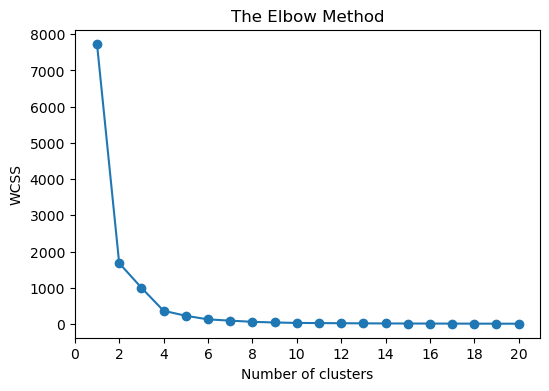

In [25]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 21), wcss, marker='o')
plt.xticks(np.arange(0, 21, 2))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The most recognizable elbow coincides with 2. Alternatively, 4 clusters might be good choice as well.

In [26]:
from sklearn import metrics
s_score = []
for cluster in range(2,21):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=101)
    kmeans.fit(data_scaled)
    pred=kmeans.predict(data_scaled)
    s_score.append(metrics.silhouette_score(data_scaled, pred))

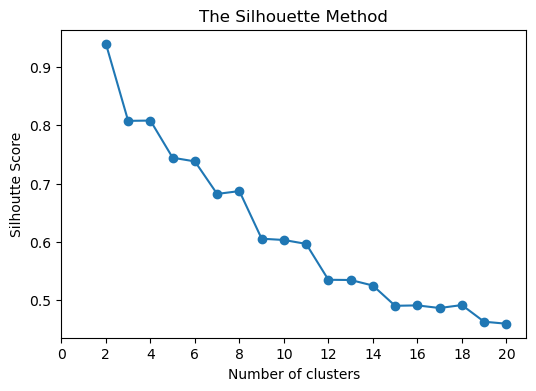

In [27]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 21), s_score, marker='o')
plt.xticks(np.arange(0, 21, 2))
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

Since there is a clear downtrend in silhoutte score as the number of clusters, let's stick with 2 clusters

In [28]:
kmeans = KMeans(n_clusters = 2, init='k-means++')
y_kmeans =kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [29]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['country'] = country_list
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,cluster,country
0,-0.206422,-0.211996,-0.222059,-0.213738,-0.209282,-0.217393,-0.207381,-0.211284,-0.210881,-0.228820,...,-0.205533,-0.202107,-0.200138,-0.192863,-0.190696,-0.190449,-0.184101,-0.184420,0,Afghanistan
1,-0.317034,-0.318517,-0.324814,-0.327036,-0.319853,-0.318376,-0.319997,-0.322234,-0.321908,-0.319687,...,-0.254175,-0.253563,-0.248449,-0.244401,-0.239481,-0.236922,-0.234261,-0.234122,0,Albania
2,-0.234776,-0.242277,-0.254337,-0.253620,-0.247439,-0.249921,-0.247624,-0.242993,-0.243454,-0.241211,...,-0.065866,-0.075833,-0.075394,-0.050572,-0.045558,-0.030297,-0.022527,-0.018632,0,Algeria
3,-0.272533,-0.276464,-0.276764,-0.280559,-0.272955,-0.272888,-0.273856,-0.280463,-0.275702,-0.273853,...,-0.163185,-0.158366,-0.150011,-0.129820,-0.126121,-0.120762,-0.130918,-0.097967,0,Angola
4,-0.339996,-0.341516,-0.347809,-0.351581,-0.343026,-0.342121,-0.344145,-0.347302,-0.346952,-0.345823,...,-0.283179,-0.280814,-0.276349,-0.272215,-0.268449,-0.265537,-0.262338,-0.261617,0,Antigua and Barbuda


In [30]:
frame['cluster'].value_counts()

0    143
1      3
Name: cluster, dtype: int64

In [31]:
frame.loc[frame['cluster'] == 0, 'country']

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
4                     Antigua and Barbuda
                      ...                
141    Venezuela (Bolivarian Republic of)
142                              Viet Nam
143                                 Yemen
144                                Zambia
145                              Zimbabwe
Name: country, Length: 143, dtype: object

In [32]:
frame.loc[frame['cluster'] == 1, 'country']

29              China, mainland
63                        India
138    United States of America
Name: country, dtype: object

As we saw in EDA, China mainland, India and USA are the most similar in terms of productivity. 